In [1]:
!pip install hvplot

In [2]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

/var/folders/g3/c42f9hrj2zjcygj7ht932xnh0000gn/T/ipykernel_16864/426622917.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [5]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
market_data_normalized = scaler.fit_transform(market_data_df)


In [6]:
# Create a DataFrame with the scaled data
scaled_data_df = pd.DataFrame(market_data_normalized, index=market_data_df.index, columns=market_data_df.columns)

# Display sample data
print(scaled_data_df.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

### Find the Best Value for k Using the Original Scaled DataFrame.

In [7]:
# Create a list with the number of k-values to try
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using the scaled DataFrame
    model.fit(scaled_data_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'K': k_values,
    'Inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)



     K     Inertia
0    1  287.000000
1    2  212.123342
2    3  170.193571
3    4   79.022435
4    5   71.097914
5    6   66.108827
6    7   54.488123
7    8   43.224693
8    9   32.860884
9   10   28.404885
10  11   24.116198


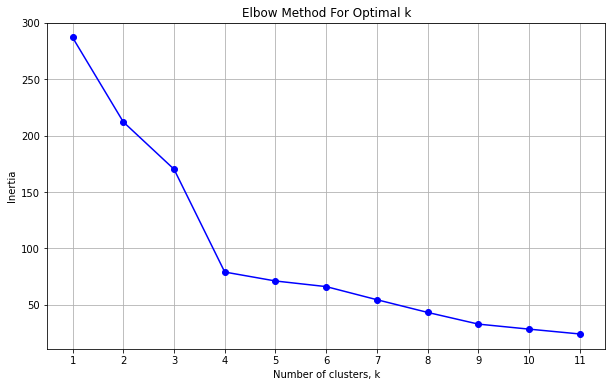

In [8]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['K'], elbow_df['Inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(elbow_df['K'])
plt.grid(True)
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [9]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=42)

In [10]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(scaled_data_df)

KMeans(n_clusters=4, random_state=42)

In [11]:
# Predict the clusters for the cryptocurrencies using the scaled data
cluster_labels = kmeans_model.predict(scaled_data_df)

# View the resulting array of cluster values
print(cluster_labels)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [12]:
# Create a copy of the DataFrame
market_data_with_clusters = scaled_data_df.copy()

In [13]:
# Add a new column to the DataFrame with the predicted clusters
market_data_with_clusters['Cluster'] = cluster_labels

# Display sample data from the updated DataFrame
print(market_data_with_clusters.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

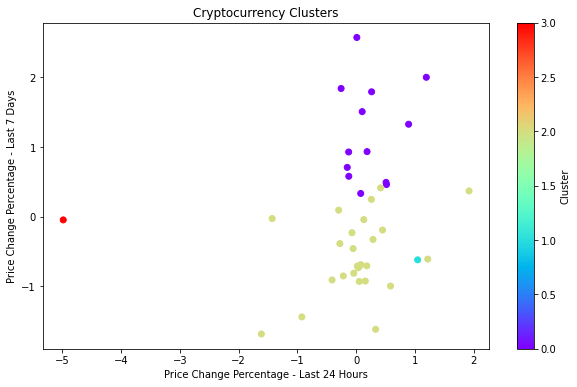

In [14]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(market_data_with_clusters['price_change_percentage_24h'], 
            market_data_with_clusters['price_change_percentage_7d'], 
            c=market_data_with_clusters['Cluster'], cmap='rainbow')

plt.title('Cryptocurrency Clusters')
plt.xlabel('Price Change Percentage - Last 24 Hours')
plt.ylabel('Price Change Percentage - Last 7 Days')
plt.colorbar(label='Cluster')
plt.show()


### Optimize Clusters with Principal Component Analysis.

In [15]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [16]:
# Assuming `pca_model` is your PCA instance and `scaled_data_df` is your scaled DataFrame

# Use the PCA model to reduce the data to three principal components
pca_transformed_data = pca_model.fit_transform(scaled_data_df)

# Convert the PCA-transformed data back into a DataFrame
pca_transformed_df = pd.DataFrame(data=pca_transformed_data, columns=['PC1', 'PC2', 'PC3'], index=scaled_data_df.index)

# View the first five rows of the DataFrame
print(pca_transformed_df.head())


                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [17]:
# Retrieve the explained variance
explained_variance = pca_model.explained_variance_ratio_

# Display the explained variance
print(f"Explained Variance by Component: {explained_variance}")
print(f"Total Explained Variance: {sum(explained_variance)}")


Explained Variance by Component: [0.3719856  0.34700813 0.17603793]
Total Explained Variance: 0.8950316570309842


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8950316570309842

In [18]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data


# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data
print(pca_transformed_df.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


### Find the Best Value for k Using the PCA Data

In [19]:
# Create a list with the number of k-values to try
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using PCA DataFrame
    model.fit(pca_transformed_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'K': k_values,
    'Inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)



     K     Inertia
0    1  256.874086
1    2  182.339530
2    3  140.431833
3    4   49.665497
4    5   42.051901
5    6   31.749005
6    7   28.031869
7    8   19.451747
8    9   13.814082
9   10   10.630648
10  11   10.120243


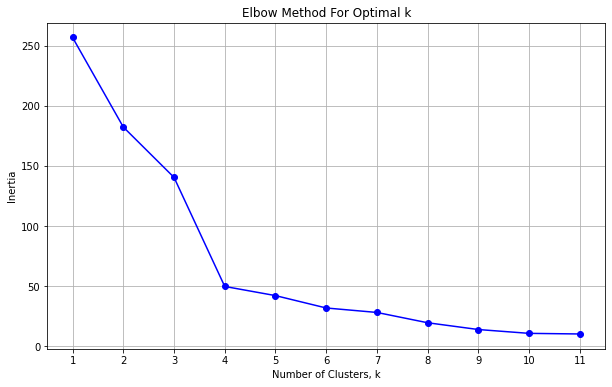

In [20]:
# Plot a line chart with all the inertia values
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['K'], elbow_df['Inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Inertia')
plt.xticks(elbow_df['K'])
plt.grid(True)
plt.show()



#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [21]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=4, random_state=42)

In [22]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_transformed_data)

KMeans(n_clusters=4, random_state=42)

In [23]:
# Predict the clusters for the cryptocurrencies using the PCA data
cluster_labels_pca = kmeans_pca.predict(pca_transformed_df)

# Print the resulting array of cluster values
print(cluster_labels_pca)



[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [24]:
# Create a copy of the DataFrame with the PCA data
pca_data_with_clusters = pca_transformed_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_data_with_clusters['Cluster'] = cluster_labels_pca

# Display sample data
print(pca_data_with_clusters.head())


                   PC1       PC2       PC3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        0
ethereum     -0.458261  0.458466  0.952877        0
tether       -0.433070 -0.168126 -0.641752        2
ripple       -0.471835 -0.222660 -0.479053        2
bitcoin-cash -1.157800  2.041209  1.859715        0


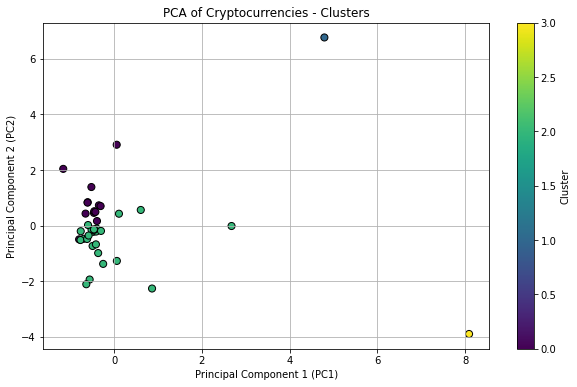

In [27]:
#I believe hvplot is a mistake. I am proceeding with matplotlib
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pca_data_with_clusters['PC1'], pca_data_with_clusters['PC2'], 
            c=pca_data_with_clusters['Cluster'], cmap='viridis', edgecolor='k', s=50)

plt.title('PCA of Cryptocurrencies - Clusters')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

### Determine the Weights of Each Feature on each Principal Component

In [28]:
# Use the columns from the original scaled DataFrame as the index.
components = pca_model.components_

# Creating a DataFrame with the components and using the columns of the scaled DataFrame as the index
feature_weights_df = pd.DataFrame(data=components, columns=scaled_data_df.columns, index=[f'PC{i+1}' for i in range(components.shape[0])])

print(feature_weights_df)


     price_change_percentage_24h  price_change_percentage_7d  \
PC1                    -0.416728                   -0.102432   
PC2                     0.358162                    0.227432   
PC3                    -0.218795                    0.787670   

     price_change_percentage_14d  price_change_percentage_30d  \
PC1                    -0.009162                     0.191523   
PC2                     0.540415                     0.562182   
PC3                     0.349534                    -0.181744   

     price_change_percentage_60d  price_change_percentage_200d  \
PC1                     0.320365                      0.594468   
PC2                     0.434040                      0.027735   
PC3                    -0.361377                      0.039733   

     price_change_percentage_1y  
PC1                    0.568379  
PC2                   -0.150789  
PC3                    0.210541  


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 

- PC1 is significantly influenced by long-term price changes over 200 days and 1 year, with short-term price changes over 24 hours negatively influencing this component.
- PC2's variation is largely captured by intermediate-term price changes over 30 days and 14 days, with yearly price changes slightly negatively influencing this component.
- PC3 is predominantly influenced by price changes over 7 days, making it sensitive to very recent market movements, while price changes over 60 days negatively affect this component.
